CountVectorizer()
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1
  (10239, 3309)	1
  (10239, 12158)	1
  (10239, 11660)	2
  (10239, 799)	1
  (10239, 2568)	1
  (10239, 11622)	1
  (10239, 2549)	1
  (10239, 10660)	1
  (10239, 8996)	1
  (10239, 10918)	1
  (10239, 3989)	1
  (10239, 10594)	1
  (10239, 6853)	1
0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with Joh

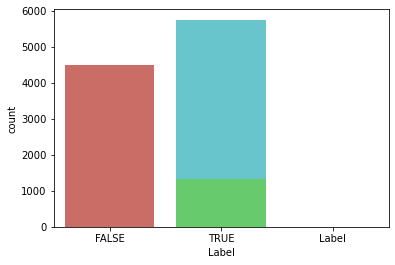

In [1]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import warnings
warnings.filterwarnings('ignore')



In [2]:
doc_new = ['obama is running for president in 2016']
nb_pipeline = Pipeline([('NBCV',FeatureSelection.countV),('nb_clf',MultinomialNB())])
nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])

0.6072128577028616

In [3]:
logR_pipeline = Pipeline([('LogRCV',FeatureSelection.countV),('LogR_clf',LogisticRegression())])
logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])

0.6013328106624853

In [4]:
svm_pipeline = Pipeline([('svmCV',FeatureSelection.countV),('svm_clf',svm.LinearSVC())])
svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])

0.5723245785966288

In [5]:
pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to c:\users\chinn\appdata\local\temp\pip-req-build-c05yuh_9
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git 'C:\Users\chinn\AppData\Local\Temp\pip-req-build-c05yuh_9'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git 'C:\Users\chinn\AppData\Local\Temp\pip-req-build-c05yuh_9'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [6]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:

      Successfully uninstalled pip-21.2.4


In [7]:
sgd_pipeline = Pipeline([('svm2CV',FeatureSelection.countV),('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter_no_change=100))])
sgd_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd == DataPrep.test_news['Label'])

0.617796942375539

In [8]:
random_forest = Pipeline([('rfCV',FeatureSelection.countV),('rf_clf',RandomForestClassifier(n_estimators=20,n_jobs=3))])
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])

0.6103488827910624

In [9]:
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(DataPrep.train_news):
        train_text = DataPrep.train_news.iloc[train_ind]['Statement'] 
        train_y = DataPrep.train_news.iloc[train_ind]['Label']
    
        test_text = DataPrep.train_news.iloc[test_ind]['Statement']
        test_y = DataPrep.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(DataPrep.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]
Total statements classified: 10240
Score: 0.6466692934443682
score length 5
Confusion matrix:
[[2254 2234]
 [1936 3816]]
Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]
Total statements classified: 10240
Score: 0.6600140391665783
score length 5
Confusion matrix:
[[2186 2302]
 [1784 3968]]
Total statements classified: 10240
Score: 0.6691604414193197
score length 5
Confusion matrix:
[[2084 2404]
 [1651 4101]]


(None, None, None, None, None)

In [11]:
##Now using n-grams
#naive-bayes classifier
nb_pipeline_ngram = Pipeline([('nb_tfidf',FeatureSelection.tfidf_ngram),('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb_ngram == DataPrep.test_news['Label'])


#logistic regression classifier
logR_pipeline_ngram = Pipeline([('LogR_tfidf',FeatureSelection.tfidf_ngram),('LogR_clf',LogisticRegression(penalty="l2",C=1))])

logR_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_ngram == DataPrep.test_news['Label'])


#linear SVM classifier
svm_pipeline_ngram = Pipeline([('svm_tfidf',FeatureSelection.tfidf_ngram),('svm_clf',svm.LinearSVC())])

svm_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm_ngram == DataPrep.test_news['Label'])


#sgd classifier
sgd_pipeline_ngram = Pipeline([('sgd_tfidf',FeatureSelection.tfidf_ngram),('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,n_iter_no_change=100))])

sgd_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd_ngram == DataPrep.test_news['Label'])


#random forest classifier
random_forest_ngram = Pipeline([('rf_tfidf',FeatureSelection.tfidf_ngram),('rf_clf',RandomForestClassifier(n_estimators=30,n_jobs=3))])
    
random_forest_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_ngram == DataPrep.test_news['Label'])


0.5883967071736574

In [12]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
Total statements classified: 10240
Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]
Total statements classified: 10240
Score: 0.7190643331130575
score length 5
Confusion matrix:
[[   5 4483]
 [   6 5746]]
Total statements classified: 10240
Score: 0.6353154276530077
score length 5
Confusion matrix:
[[2191 2297]
 [2004 3748]]


(None, None, None, None, None)

In [13]:
print(classification_report(DataPrep.test_news['Label'], predicted_nb_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_LogR_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_svm_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_sgd_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_rf_ngram))

              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551

              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551

              preci

In [14]:
DataPrep.test_news['Label'].shape

(2551,)

In [15]:
#grid-search parameter optimization
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'rf_tfidf__use_idf': (True, False),
               'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:100],DataPrep.train_news['Label'][:100])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:100],DataPrep.train_news['Label'][:100])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

#Linear SVM 
parameters = {'svm_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'svm_tfidf__use_idf': (True, False),
               'svm_tfidf__smooth_idf': (True, False),
               'svm_clf__penalty': ('l1','l2'),
}

gs_clf = GridSearchCV(svm_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:100],DataPrep.train_news['Label'][:100])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_


{'mean_fit_time': array([0.02187138, 0.01874003, 0.01562538, 0.00936913, 0.02512336,
        0.02490511, 0.01896772, 0.02187138, 0.02488403, 0.02505479,
        0.02812071, 0.02951918, 0.03749175, 0.03472509, 0.031248  ,
        0.03109856, 0.04062181, 0.03746648, 0.03749418, 0.03125453,
        0.01875439, 0.01249061, 0.02153373, 0.01249022, 0.02516928,
        0.01873636, 0.02812252, 0.0280148 , 0.02819939, 0.02191691,
        0.0315093 , 0.02715325, 0.02805004, 0.02811766, 0.03122878,
        0.03060689, 0.03457551, 0.03229446, 0.03127885, 0.03430276]),
 'std_fit_time': array([7.65342904e-03, 6.24759718e-03, 4.53772631e-06, 7.64986765e-03,
        7.45863873e-03, 7.58134333e-03, 6.63491269e-03, 7.64973171e-03,
        1.25837071e-02, 7.70609236e-03, 6.24889713e-03, 3.41798072e-03,
        1.24971761e-02, 6.56263343e-03, 9.86515351e-03, 9.85837125e-03,
        7.64816081e-03, 7.65709837e-03, 7.65249690e-03, 9.87880374e-03,
        6.24567933e-03, 6.24531647e-03, 7.49386629e-03, 6.245

In [15]:
#by running above commands we can find the model with best performing parameters


#running both random forest and logistic regression models again with best parameter found with GridSearch method
random_forest_final = Pipeline([
        ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))])
    
random_forest_final.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_final = random_forest_final.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_final == DataPrep.test_news['Label'])
print(metrics.classification_report(DataPrep.test_news['Label'], predicted_rf_final))

logR_pipeline_final = Pipeline([
        #('LogRCV',countV_ngram),
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))])

logR_pipeline_final.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_final == DataPrep.test_news['Label'])
#accuracy = 0.62
print(metrics.classification_report(DataPrep.test_news['Label'], predicted_LogR_final))


              precision    recall  f1-score   support

       False       0.33      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.44      0.50      0.35      2551
weighted avg       0.45      0.54      0.38      2551

              precision    recall  f1-score   support

       False       0.64      0.38      0.48      1169
        True       0.61      0.82      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


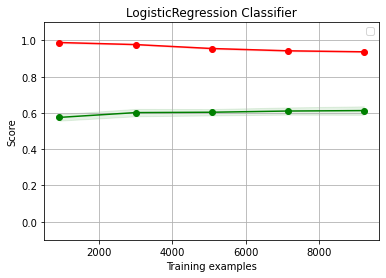

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


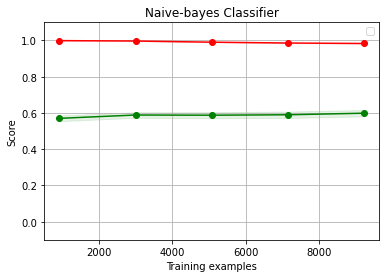

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


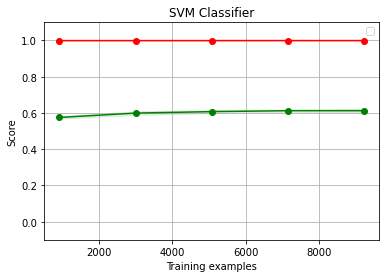

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


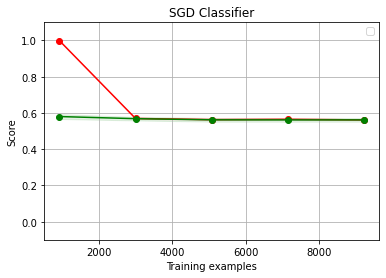

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


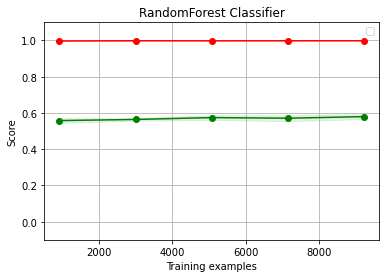

In [16]:
#saving best model to the disk
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))


def plot_learing_curve(pipeline,title):
    size = 10
    cv = KFold(size, shuffle=True)
    
    X = DataPrep.train_news["Statement"]
    y = DataPrep.train_news["Label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

#below command will plot learing curves for each of the classifiers
plot_learing_curve(logR_pipeline_ngram,"LogisticRegression Classifier")
plot_learing_curve(nb_pipeline_ngram,"Naive-bayes Classifier")
plot_learing_curve(svm_pipeline_ngram,"SVM Classifier")
plot_learing_curve(sgd_pipeline_ngram,"SGD Classifier")
plot_learing_curve(random_forest_ngram,"RandomForest Classifier")

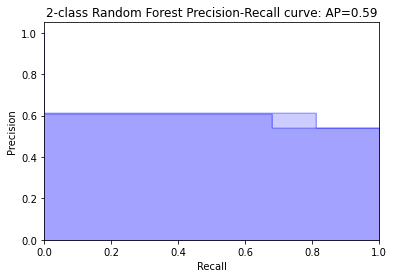

In [17]:
#plotting Precision-Recall curve
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(DataPrep.test_news['Label'], classifier)
    average_precision = average_precision_score(DataPrep.test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Random Forest Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    
plot_PR_curve(predicted_LogR_ngram)
plot_PR_curve(predicted_rf_ngram)

In [19]:
def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError("Cannot compute most informative features on {}.".format(classifier.__class__.__name__))
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names_out()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append("Classified as: {}".format(model.predict([text])))
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append("{:0.4f}{: >15}    {:0.4f}{: >15}".format(cp, fnp, cn, fnn))
    #return "\n".join(output)
    print(output)

show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')
#show_most_informative_features(nb_pipeline_ngram, vect='nb_tfidf', clf='nb_clf')
show_most_informative_features(svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')
show_most_informative_features(sgd_pipeline_ngram,vect='sgd_tfidf',clf='sgd_clf')


['3.3274        percent    -2.0938      obamacare', '1.8485        million    -1.8249          obama', '1.7409        average    -1.6505           says', '1.6573            day    -1.5980      wisconsin', '1.6514        georgia    -1.4068            rep', '1.6174           debt    -1.3510     government', '1.6029      countries    -1.2283           care', '1.5744          times    -1.2013           plan', '1.4221        highest    -1.1898      president', '1.3850        country    -1.1784   scott walker', '1.3490           half    -1.1635         walker', '1.3286            000    -1.0761         obamas', '1.2220       american    -1.0428          scott', '1.2136            cut    -1.0123           away', '1.2060         months    -0.9792        clinton', '1.1675         states    -0.9715         barack', '1.1637      americans    -0.9658       medicare', '1.0659           rate    -0.9373       stimulus', '1.0616           year    -0.9210          white', '1.0163             60    -0.9